<a href="https://colab.research.google.com/github/aideveloperme/AI-Project/blob/main/ICH_CNN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Introduction**

---

classify Brain CT Scan images into Hemorrhage and non-hemorrhage using deep
neural netwokr from scartch. we use Keras image preprocessing layers for image standardization and data augmentation.

# Setup

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:


# import the libraries as shown below

import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

# Split the dataset into train,test,validation





In [ ]:
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders

In [ ]:
input_folder = '/content/drive/MyDrive/intracranial brain hemorrhage dataset/DATA_BINARY/hemorrhage_Normal'

In [ ]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output="Dataset_brain_CT",
                   seed=42, ratio=(.7, .2, .1),
                   group_prefix=None) # default values

Copying files: 2501 files [00:57, 43.36 files/s] 


# Generate a Dataset

In [ ]:
#Define Directories for train, test & Validation Set
train_path = '/content/Dataset_brain_CT/train'
test_path = '/content/Dataset_brain_CT/test'
valid_path = '/content/Dataset_brain_CT/val'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 32
#The dimension of the images we are going to define is 500x500 img_height = 500
img_width = 500
img_height =500

Using image data augmentation

---


We don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or Image is enlarged by a zoom of 0.2 or angle os shear 0.2. This helps expose the model to different aspects of the training data while slowing down overfitting.

In [ ]:
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )

Found 1750 images belonging to 2 classes.
Found 251 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Visualize the data

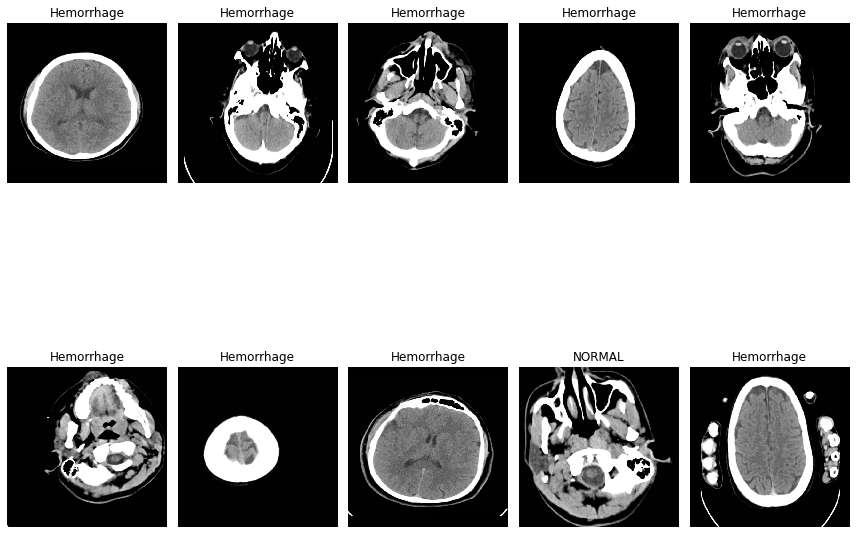

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'NORMAL', 1:'Hemorrhage'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

# Build a Model
Convoluational Neural Networks Architecture

In [ ]:
#from keras.layers import BatchNormalization


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

#cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
#cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

#cnn.add(Dense(activation = 'relu', units = 128))

cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))


Model Compile

In [ ]:
tf.keras.optimizers.Adam


keras.optimizer_v2.adam.Adam

In [ ]:
cnn.compile(optimizer ='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0

CNN Architecture



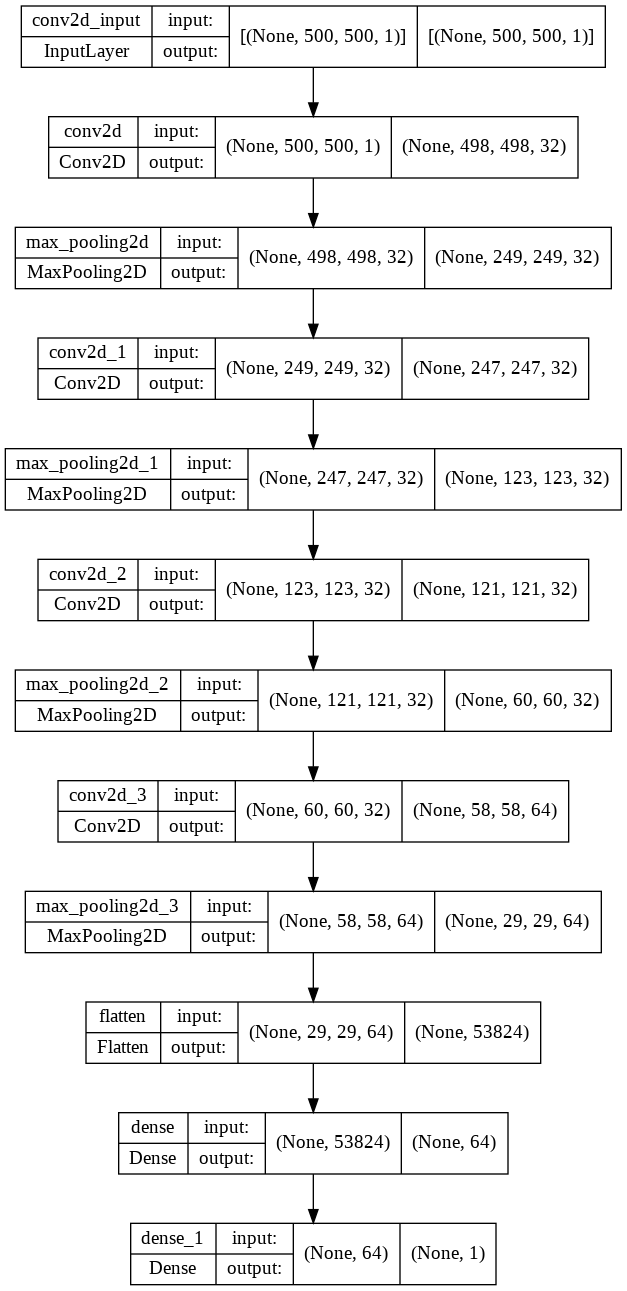

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
#weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
weights = compute_class_weight( 'balanced', classes=np.unique(train.classes),  y=train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.3157894736842106, 1: 0.8064516129032258}


Train the Model

In [ ]:
cnn.fit(train,epochs=1, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/100
55/55 [==============================] - 64s 815ms/step - loss: 0.7010 - accuracy: 0.5411 - val_loss: 0.6910 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/100
55/55 [==============================] - 45s 811ms/step - loss: 0.6924 - accuracy: 0.5137 - val_loss: 0.6915 - val_accuracy: 0.5720 - lr: 0.0010
Epoch 3/100
55/55 [==============================] - 42s 759ms/step - loss: 0.6908 - accuracy: 0.5937 - val_loss: 0.6700 - val_accuracy: 0.6300 - lr: 0.0010
Epoch 4/100
55/55 [==============================] - 41s 750ms/step - loss: 0.6787 - accuracy: 0.5983 - val_loss: 0.6323 - val_accuracy: 0.6220 - lr: 0.0010
Epoch 5/100
55/55 [==============================] - 41s 744ms/step - loss: 0.6545 - accuracy: 0.6126 - val_loss: 0.6247 - val_accuracy: 0.6260 - lr: 0.0010
Epoch 6/100
55/55 [==============================] - 49s 893ms/step - loss: 0.6339 - accuracy: 0.6440 - val_loss: 0.5830 - val_accuracy: 0.6920 - lr: 0.0010


KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(cnn.history.history).plot()

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.plot(cnn.history.history['accuracy'])
plt.plot(cnn.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn.history.history['loss'])
plt.plot(cnn.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
preds = cnn.predict(test,verbose=1)


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual ICH"],
columns=["Predicted Normal", "Predicted hemmorhage"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','hemmorhage']))

In [ ]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels
dic = {0:'NORMAL', 1:'hemmorhage'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5:
      out = ('{:.2%} probability of being ich case'.format(preds[i][0]))


  else:
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

# **MobileNet.........**

In [ ]:
import keras
from keras import backend as K
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.mobilenet import MobileNet

from keras.applications.vgg16 import VGG16, preprocess_input


from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax

#from keras.optimizers import Adam, Adamax
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

In [ ]:
#included in our dependencies
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 zoom_range=0.1,
                                 horizontal_flip=False)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#(rescale=1./255)

In [ ]:
# this is where you specify the path to the main data folder
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 1750 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


# **Model-Fine Tuning MobileNet**

In [ ]:
K.clear_session()


In [ ]:
#model.compile()
#model.run_eagerly = True

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              min_delta=0.0001, patience=1, verbose=1)

In [ ]:
#from keras.applications.mobilenet_v2 import MobileNetV2
#base_model = MobileNetV2(weights='imagenet',include_top=False)

#imports the mobilenet model and discards the last 1000 neuron layer.
base_model = MobileNet(weights='imagenet',include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=1-0.5)(x)
#x = Dense(512, kernel_regularizer='l2', kernel_initializer='he_normal', activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(rate=1-0.5)(x)
x = Dense(256, kernel_regularizer='l2', kernel_initializer='he_normal', activation='relu')(x)
x = Dropout(rate=1-0.5)(x)
preds = Dense(2, activation='softmax')(x) #final layer with softmax activation

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model = Model(inputs=base_model.input, outputs=preds)


In [ ]:
print('the network has {} layers'.format(len(model.layers)))


the network has 91 layers


[link text](https://)We freeze the first 65, because we want to maintain the abstract shapes that MobileNet has learned from imagenet dataset



In [ ]:
model.layers[53:] # 65layers

In [ ]:
for layer in model.layers[:53]:
    layer.trainable=False
for layer in model.layers[53:]:
    layer.trainable=True

In [ ]:
model.compile()
model.run_eagerly = True

In [ ]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001, amsgrad=False)
#opt = Adamax(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = validation_generator.n//validation_generator.batch_size

history = model.fit_generator(generator=train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=step_size_train,
                              validation_steps=step_size_val,
                              epochs=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


54/54 [==============================] - ETA: 0s - batch: 26.5000 - size: 31.8148 - loss: 5.2315 - accuracy: 0.6094

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


54/54 [==============================] - 31s 468ms/step - batch: 26.5000 - size: 31.8148 - loss: 5.2312 - accuracy: 0.6094 - val_loss: 4.2200 - val_accuracy: 0.6187


# Evaluation-mobilenetv2

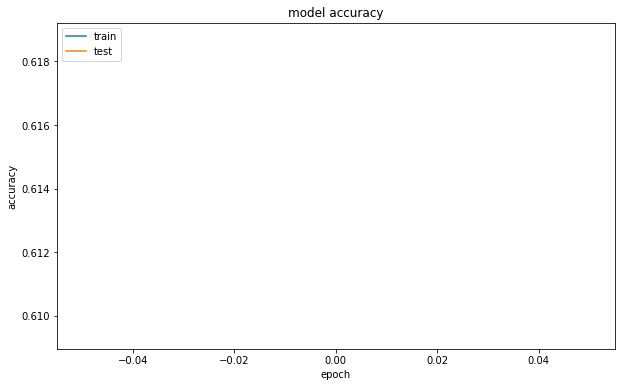

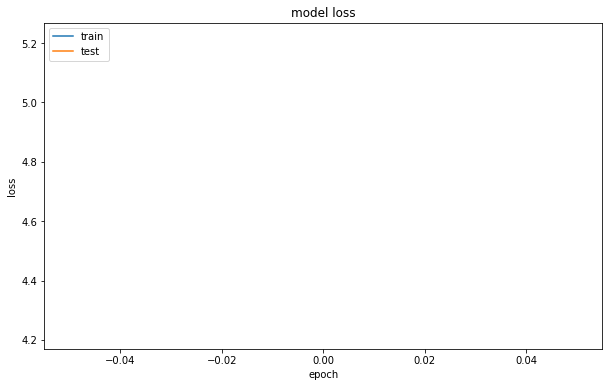

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**VGG16*

# **MODEL INTERPRETABILITY**-**MobileNet**

In [ ]:
def proc_img(img_path):
  "process the image"
  # `img` is a PIL image of size 224x224
  img = image.load_img(img_path, target_size=(224, 224))

  # `x` is a float32 Numpy array of shape (224, 224, 3)
  x_img = image.img_to_array(img)

  # We add a dimension to transform our array into a matrix
  # of size (1, 224, 224, 3)
  x_img = np.expand_dims(x_img, axis=0)

  # Finally we preprocess the batch
  # (this does channel-wise color normalization)
  #x_img = preprocess_input(x_img)
  x_img = preprocess_input(x_img)
  return x_img

In [ ]:
test_path = '/content/Dataset_brain_CT/test/'

# Get the path to the normal and ich sub-directories
normal_cases_dir = '/content/Dataset_brain_CT/test/Normal'
pneumonia_cases_dir = '/content/Dataset_brain_CT/test/Hemorrhage'

# Get the list of all the images
normal_cases = '/content/Dataset_brain_CT/test/Normal/*'
Hemorrhage_cases ='/content/Dataset_brain_CT/test/Hemorrhage/*'

# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    test_data.append((img,0))

# Go through all the ich cases. The label for these cases will be 1
for img in Hemorrhage_cases:
    test_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list
test_data = pd.DataFrame(test_data, columns=['image', 'label'], index=None)

# Shuffle the data
test_data = test_data.sample(frac=1.).reset_index(drop=True)

In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   82 non-null     object
 1   label   82 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
test_data.head()


,image,label
0,/,0
1,T,0
2,a,0
3,o,1
4,t,1


# **Visualizing heatmap of class**

*Visualizing heatmap of class**

In [ ]:
def prnt_out(x_img):
  "prints the probability that the model predict with its label"
  pred = model.predict(x_img)
  if pred[0,0] >= 0.5:
      print('Our network is {:.2%} sure this is Hemorrhage'.format(pred[0][0]))
  else:
      print('Our network is {:.2%} sure this is Normal'.format(1-pred[0][0]))

In [ ]:
"""To visualize which parts of the image are the most important for the each
label for the classifier, let’s set up the Grad-CAM process."""

blck = 'conv_pw_13'  #MobileNet
#blck ='conv_pw_13_relu'
#blck = 'Conv_1'  #MobileNetV2
def xray_CAM(x_img, blck, label):
  "gives the CAM heatmap"
  #normal=0 and pneumonia=1

  # the prediction vector
  pred_output = model.output[:, label]

  # The is the output feature map of the `conv_pw_13` layer,
  # the last convolutional layer in MobileNet
  last_conv_layer = model.get_layer(blck)

  # This is the gradient of the image's class with regard to
  # the output feature map of `conv_pw_13`
  grads = K.gradients(pred_output, last_conv_layer.output)[0]

  # This is a vector of shape (512,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of `block5_conv3`,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image of two elephants
  pooled_grads_value, conv_layer_output_value = iterate([x_img])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the elephant class
  for i in range(1024): # we have 1024 features in our last conv layer
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(conv_layer_output_value, axis=-1) # create a heatmap
  heatmap = np.maximum(heatmap, 0)  # remove negative values
  heatmap /= np.max(heatmap)  # normalize

  return heatmap

In [ ]:
import cv2

In [ ]:
def show_on_xray(img_path, heatmap):
  # We use cv2 to load the original image
  img = cv2.imread(img_path)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img

  ## Save the image to disk
  cv2.imwrite('./xray_cam.jpg', superimposed_img)
  img_samp = cv2.imread('./xray_cam.jpg')  #OpenCV has BGR order
  img_samp = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)  #matplotlib has RGB order

  plt.imshow(img_samp)

In [ ]:
# The local path to our target image
img_path ='/content/Dataset_brain_CT/test/Hemorrhage/66 (27).jpg'

x_img = proc_img(img_path)

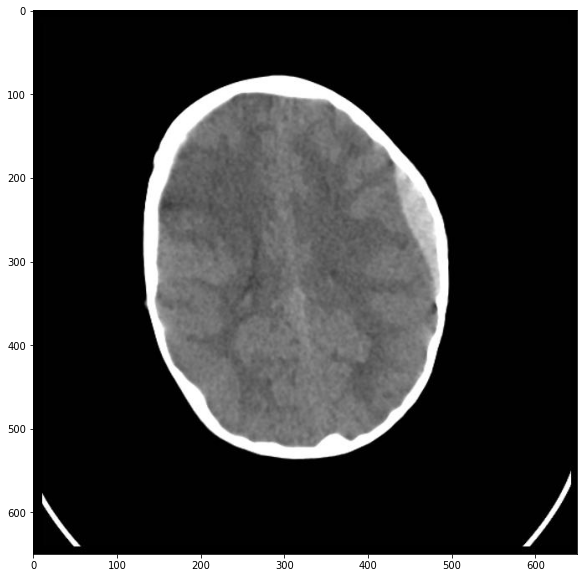

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
img_samp = cv2.imread(img_path)
plt.imshow(img_samp);

In [ ]:
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
prnt_out(x_img)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Our network is 73.56% sure this is Normal


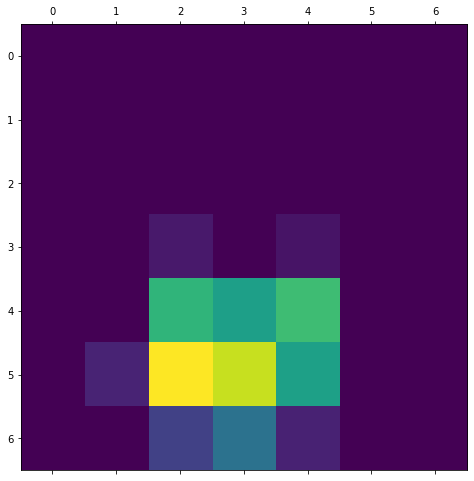

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
heatmap = xray_CAM(x_img, blck, 1)
plt.matshow(heatmap)
plt.show()

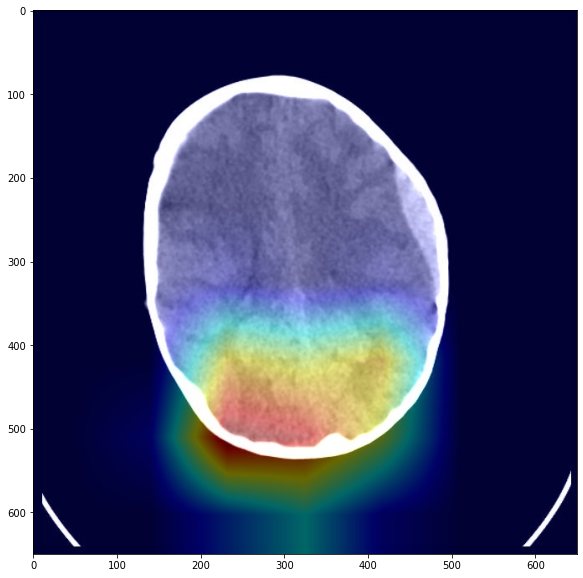

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
show_on_xray(img_path, heatmap)

In [ ]:
img_path = '/content/Dataset_brain_CT/test/Hemorrhage/97 (32).jpg'
x_img = proc_img(img_path)
prnt_out(x_img)

Our network is 73.71% sure this is Normal


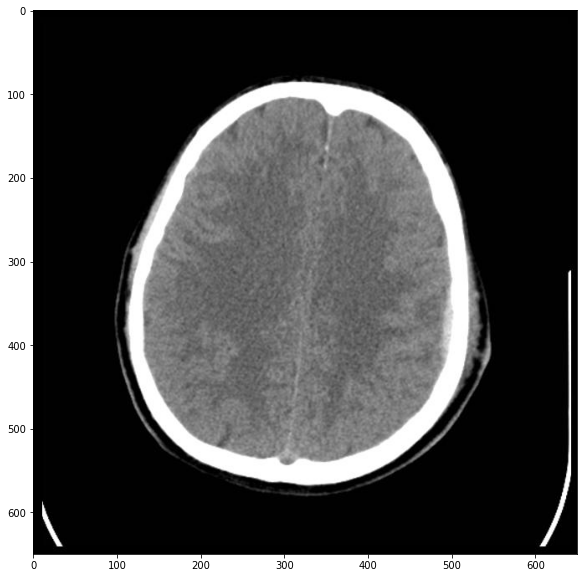

In [ ]:
img_samp_n = cv2.imread(img_path)
plt.imshow(img_samp_n);

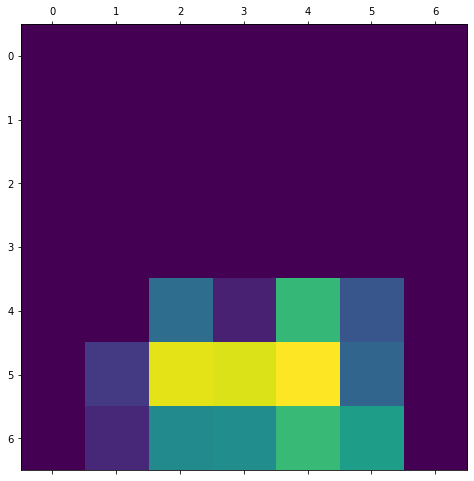

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
heatmap = xray_CAM(x_img, blck, 1)
plt.matshow(heatmap)
plt.show()

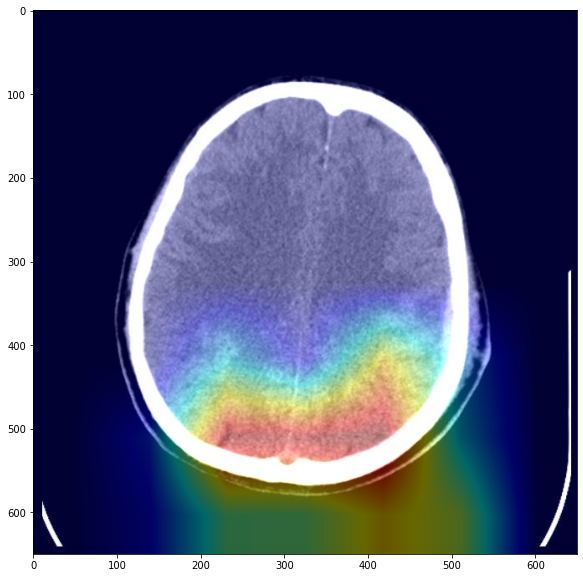

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
show_on_xray(img_path, heatmap)

NORMAL


In [ ]:
img_path_n = '/content/Dataset_brain_CT/test/Normal/106 (1).jpg'
#img_path = ''
x_img_n = proc_img(img_path_n)
prnt_out(x_img_n)

Our network is 91.76% sure this is Normal


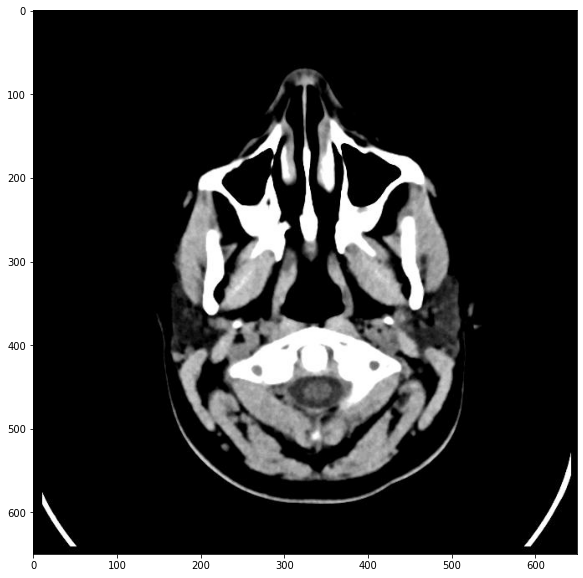

In [ ]:
img_samp_n = cv2.imread(img_path_n)
plt.imshow(img_samp_n);

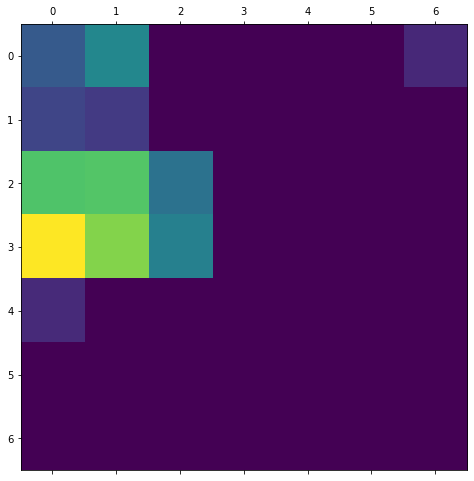

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
heatmap_n = xray_CAM(x_img_n, blck, 0)
plt.matshow(heatmap_n)
plt.show()

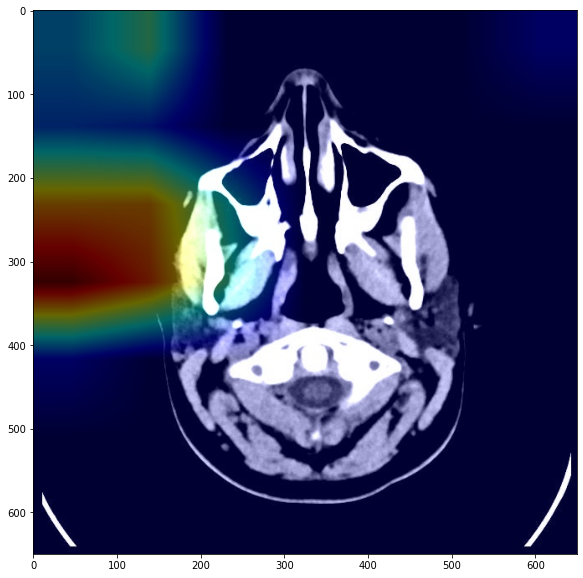

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
show_on_xray(img_path_n, heatmap_n)

In [ ]:
img_path_n = '/content/Dataset_brain_CT/test/Normal/104 (23).jpg'
x_img_n = proc_img(img_path_n)
prnt_out(x_img_n)

Our network is 85.56% sure this is Normal


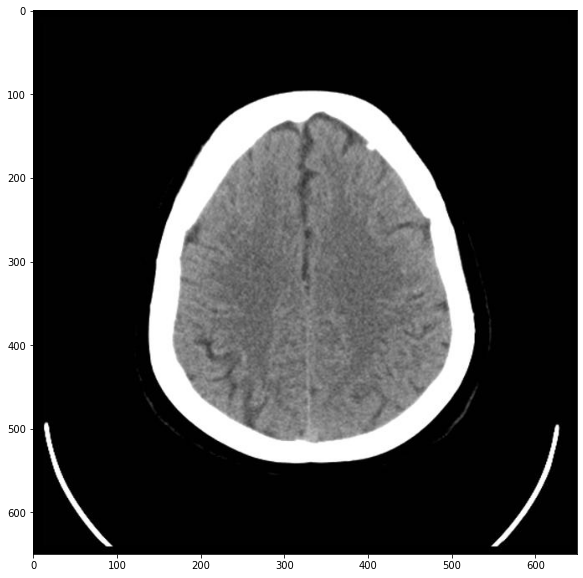

In [ ]:
img_samp_n = cv2.imread(img_path_n)
plt.imshow(img_samp_n);

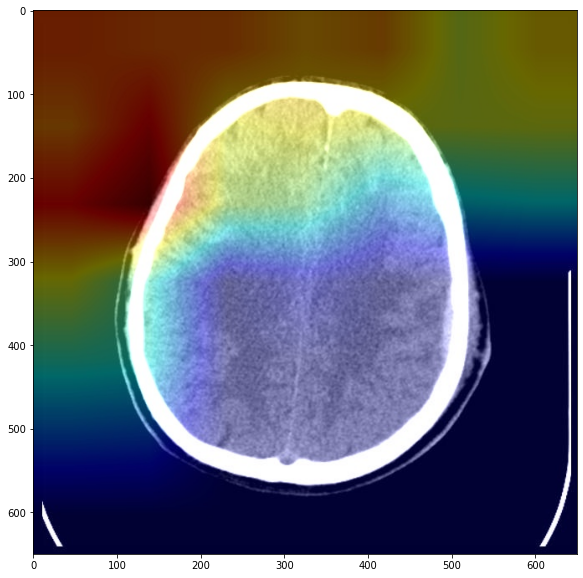

In [ ]:
heatmap = xray_CAM(x_img_n, blck, 0)
plt.rcParams['figure.figsize'] = (12.0, 10.0)
show_on_xray(img_path, heatmap)

all image

# VGG-16

In [ ]:
import os
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np


In [ ]:
#included in our dependencies
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 zoom_range=0.1,
                                 horizontal_flip=False)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#(rescale=1./255)


In [ ]:
# this is where you specify the path to the main data folder
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False)
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=1,
    class_mode='categorical',
    shuffle=True)

Found 1750 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              min_delta=0.0001, patience=1, verbose=1)

Loading the Base Model


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='Softmax')(x)

model = tf.keras.models.Model(base_model.input, x)


Compile and Fit

In [ ]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001, amsgrad=False)
#opt = Adamax(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Summary

In [ ]:
model.summary()

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = validation_generator.n//validation_generator.batch_size

history = model.fit_generator(generator=train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=step_size_train,
                              validation_steps=step_size_val,
                              epochs=20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
54/54 [==============================] - 34s 612ms/step - loss: 0.7441 - accuracy: 0.8458 - val_loss: 0.4991 - val_accuracy: 0.8521
Epoch 2/20
54/54 [==============================] - 25s 461ms/step - loss: 0.4668 - accuracy: 0.8510 - val_loss: 0.5170 - val_accuracy: 0.8125
Epoch 3/20
54/54 [==============================] - 26s 478ms/step - loss: 0.4440 - accuracy: 0.8714 - val_loss: 1.9407 - val_accuracy: 0.7750
Epoch 4/20
54/54 [==============================] - 25s 459ms/step - loss: 0.3814 - accuracy: 0.8661 - val_loss: 0.2459 - val_accuracy: 0.9000
Epoch 5/20
54/54 [==============================] - 25s 462ms/step - loss: 0.3723 - accuracy: 0.8650 - val_loss: 0.2968 - val_accuracy: 0.8771
Epoch 6/20
54/54 [==============================] - 26s 482ms/step - loss: 0.3077 - accuracy: 0.8731 - val_loss: 0.2577 - val_accuracy: 0.8917
Epoch 7/20
54/54 [==============================] - 25s 463ms/step - loss: 0.2197 - accuracy: 0.9109 - val_loss: 0.2545 - val_accuracy: 0.9021

##**InceptionV3**


Load Basemodel of inception

In [ ]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='Softmax')(x)

model = tf.keras.models.Model(base_model.input, x)


In [ ]:
model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = validation_generator.n//validation_generator.batch_size

INCE = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch=step_size_train,
                              validation_steps=step_size_val, epochs = 20)

Epoch 1/20
54/54 [==============================] - 34s 561ms/step - loss: 371.0213 - accuracy: 0.5856 - val_loss: 143.5490 - val_accuracy: 0.4812
Epoch 2/20
54/54 [==============================] - 23s 424ms/step - loss: 49.9651 - accuracy: 0.6531 - val_loss: 17.8258 - val_accuracy: 0.6792
Epoch 3/20
54/54 [==============================] - 23s 436ms/step - loss: 4.7892 - accuracy: 0.6583 - val_loss: 0.9576 - val_accuracy: 0.6479
Epoch 4/20
54/54 [==============================] - 23s 427ms/step - loss: 0.6156 - accuracy: 0.7002 - val_loss: 0.5933 - val_accuracy: 0.7000
Epoch 5/20
54/54 [==============================] - 23s 419ms/step - loss: 0.5438 - accuracy: 0.7328 - val_loss: 0.5491 - val_accuracy: 0.7271
Epoch 6/20
54/54 [==============================] - 23s 421ms/step - loss: 0.4667 - accuracy: 0.7782 - val_loss: 0.5649 - val_accuracy: 0.7458
Epoch 7/20
54/54 [==============================] - 23s 421ms/step - loss: 0.4964 - accuracy: 0.7660 - val_loss: 0.5765 - val_accuracy: 

# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(2, activation='softmax'))

In [ ]:
base_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = validation_generator.n//validation_generator.batch_size

INCE = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch=step_size_train,
                              validation_steps=step_size_val, epochs = 20)

Epoch 1/20
54/54 [==============================] - 29s 537ms/step - loss: 1.4513 - accuracy: 0.6013 - val_loss: 36552.8320 - val_accuracy: 0.6042
Epoch 2/20
54/54 [==============================] - 28s 528ms/step - loss: 1.2583 - accuracy: 0.6426 - val_loss: 4005.9314 - val_accuracy: 0.5979
Epoch 3/20
54/54 [==============================] - 28s 516ms/step - loss: 0.9507 - accuracy: 0.6950 - val_loss: 12.1951 - val_accuracy: 0.6042
Epoch 4/20
54/54 [==============================] - 28s 527ms/step - loss: 1.0493 - accuracy: 0.6921 - val_loss: 40.5073 - val_accuracy: 0.4563
Epoch 5/20
54/54 [==============================] - 28s 520ms/step - loss: 1.4198 - accuracy: 0.7154 - val_loss: 7716.7437 - val_accuracy: 0.3958
Epoch 6/20
54/54 [==============================] - 28s 517ms/step - loss: 1.2637 - accuracy: 0.6391 - val_loss: 48090.4336 - val_accuracy: 0.3958
Epoch 7/20
54/54 [==============================] - 29s 542ms/step - loss: 1.0714 - accuracy: 0.6286 - val_loss: 382.9980 - va